# 实验七：数据可视化分析+工具入门

In [1]:
#1-导包
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.charts import Line
#from pyecharts.commons.utils import JsCode
#from pyecharts.globals import ThemeType
#中文配置
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False #坐标轴为正 

# 案例一：天气气温变化分析

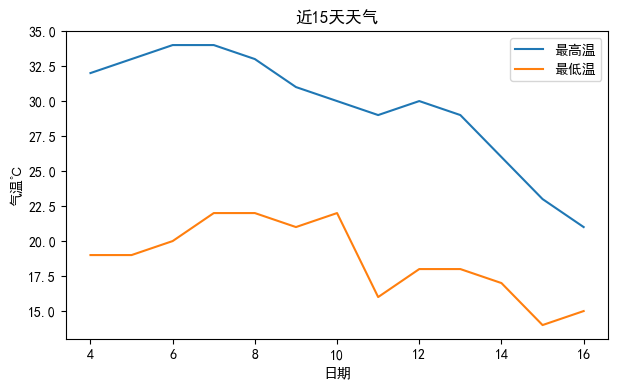

In [2]:
#2 -构造图形所需要的数据、xy轴
df=pd.read_excel(r'5月7日\01_未来15天最高气温和最低气温.xlsx')
df
x_data = np.arange(4,17,1)
y1 = df['最高温']
y2 = df['最低温']
# 3- 绘制图形
plt.figure(figsize=(7, 4))
plt.plot(x_data,y1)
plt.plot(x_data,y2)
# 4- 配置图形
plt.title('近15天天气')
plt.legend(['最高温','最低温'])
plt.xlabel('日期')
plt.ylabel('气温℃')
#5-渲染出图
plt.show()

上图的分析结论如下：近两周天气气温逐渐下降，其中明后天最高温预计25°左右。

# 案例2：分析阿里历年的销售额

In [17]:
#2-构造数据
df_gmv=pd.read_excel(r'5月7日\02_阿里京东历年双11销售金额.xlsx')
df_gmv

x_gmv = df_gmv['时间'].to_list() #x轴数据，为日期列表
y_gmv_tm = df_gmv['天猫'].to_list() #y轴数据，为金额列表
y_gmv_jd = df_gmv['京东'].to_list() #京东销售额数据，与

#3-绘制图形
bar_gmv = (
         #第一步：初始化一个画布
         Line(init_opts=opts.InitOpts(width='750px',height='300px')
            )
         #第二步：链式调用，依次画xy轴
         .add_xaxis(x_gmv)
         .add_yaxis(
             series_name="天猫",
             y_axis= y_gmv_tm,
             # 设置柱子颜色 
             itemstyle_opts=opts.ItemStyleOpts(color="red")
         )
         .add_yaxis(
             series_name="京东",
             y_axis= y_gmv_jd,
             # 设置柱子颜色 
             itemstyle_opts=opts.ItemStyleOpts(color="blue")
         )     
     
      #第三步：链式调用，配置图形
         .set_global_opts(
             title_opts=opts.TitleOpts(title="天猫与京东历年双12销售额对比分析"),
             # 设置x轴标签 
             xaxis_opts=opts.AxisOpts(name="时间"),
             # 设置y轴标签 
             yaxis_opts=opts.AxisOpts(name="单位:亿元")             
         )
 )

#4-渲染出图
bar_gmv.render_notebook()

上图结论：双11活动从2011-2021十年期间发展迅速，其中17-19
2022年开始电商双11开始走下坡。

# 案例3：分析各种商品的代替率

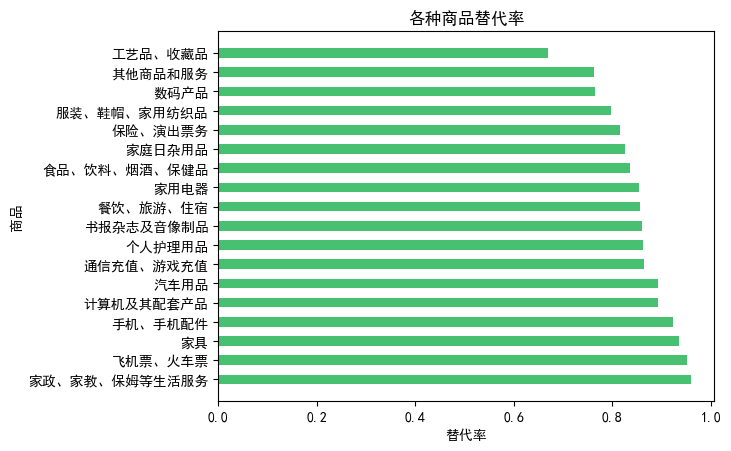

In [18]:
#商品代替率 Commodity substitution rate
#2-构造数据
df_csr=pd.read_csv(r'5月7日\03_用户网购替代率.csv',encoding="GBK")
df_csr

y_csr = df_csr['商品种类'].to_list() #x轴数据，为商品种类列表
y_csr
x_csr = df_csr['替代率'].to_list() #x轴数据，为商品种类列表
x_float = ( df_csr['替代率'].str.strip("%").astype(float)/100 );#y轴数据，str转化为float类型，为替代率列表 
x_csr = x_float.round(3).tolist()
#保留小数点后面1位 #p_float_2 = p_float.round(decimals=1)
y_csr
x_csr

#3-绘制条形图
plt.barh(y_csr,x_csr,color="#48c072",height=0.5)
#4-添加标题和坐标轴
plt.title('各种商品替代率')
plt.xlabel('替代率')
plt.ylabel('商品')
#显示图形
plt.show()

上图结论：家政、家教、保姆等生活服务的商品替代率最高;工艺品、收藏品的商品替代率最低。

# 案例4：分析物流公司的每月费用

In [19]:
#物流费：physical distribution expenses  
#2-构造数据 
df_pde=pd.read_excel(r'5月7日\04_物流公司费用(万元).xlsx')
df_pde

x_pde = df_pde['月份'].to_list() #x轴数据，为月份列表
y_pde_yd = df_pde['韵达'].to_list() #y轴数据，为韵达费用列表
y_pde_EMS = df_pde['EMS'].to_list() #y轴数据，为EMS费用列表
y_pde_sf = df_pde['顺丰'].to_list() #y轴数据，为顺丰费用列表

#3-绘制图形[#ffff81，#ff796c，#caa0ff	]
bar_pde = (
         #第一步：初始化一个画布Bar柱形图
         Bar(init_opts=opts.InitOpts(width='750px',height='600px')
            )
         #第二步：链式调用，依次画xy轴
         .add_xaxis(x_pde)
    
         .add_yaxis(
             series_name="韵达",
             y_axis= y_pde_yd,
             # 设置柱子颜色 
             itemstyle_opts=opts.ItemStyleOpts(color="#ffff81")
         )
         .add_yaxis(
             series_name="EMS",
             y_axis= y_pde_EMS,
             # 设置柱子颜色 
             itemstyle_opts=opts.ItemStyleOpts(color="#ff796c")
         )
        .add_yaxis(
                 series_name="顺丰",
                 y_axis= y_pde_sf,
                 # 设置柱子颜色 
                 itemstyle_opts=opts.ItemStyleOpts(color="#caa0ff")
             )    
     
          #第三步：链式调用，配置图形
         .set_global_opts(
             title_opts=opts.TitleOpts(title="物流公司费用对比分析"),
             # 设置x轴标签 
             xaxis_opts=opts.AxisOpts(name="单位:万元"),
             # 设置y轴标签 
             yaxis_opts=opts.AxisOpts(name="月份")             
         )
         #第四步：翻转XY轴
        .reversal_axis()
 )

#4-渲染出图
bar_pde.render_notebook()

上图结论：EMS公司的物流费用比韵达和顺丰的费用都高，
并且在12月份这三个公司的物流费用最高。

# 案例5：分析全国2020年和2021年每月发电量

In [20]:
#全国发电量：National power generation

#2-构造数据
df_npg=pd.read_excel(r'5月7日\05_全国发电量统计.xlsx')
df_npg

x_npg = df_npg['月份'].to_list() #x轴数据，为月份列表
y_npg_2021 = df_npg['2021年'].to_list() #y轴数据，为2021年列表
y_npg_2020 = df_npg['2020年'].to_list() #y轴2020年电量数据

#3-绘制图形
bar_npg = (
         #第一步：初始化一个画布
         Line(init_opts=opts.InitOpts(width='750px',height='300px')
            )
         #第二步：链式调用，依次画xy轴
         .add_xaxis(x_npg)
         .add_yaxis(
             series_name="2021年",
             y_axis= y_npg_2021,
             symbol="diamond",
             # 设置柱子颜色 
             #itemstyle_opts=opts.ItemStyleOpts(color="red")
             #图形填充颜色
             color='red',
             #t图形透明度
             areastyle_opts=opts.AreaStyleOpts(opacity=0.5)
         )
         .add_yaxis(
             series_name="2020年",
             y_axis= y_npg_2020,
             symbol="diamond",
             # 设置柱子颜色 
             #itemstyle_opts=opts.ItemStyleOpts(color="blue")
             #图形填充颜色
             color='blue',
             #t图形透明度
             areastyle_opts=opts.AreaStyleOpts(opacity=0.5)
         )     
     
      #第三步：链式调用，配置图形
         .set_global_opts(
             title_opts=opts.TitleOpts(title="2021年和2020年全国电量对比分析"),
             # 设置x轴标签 
             xaxis_opts=opts.AxisOpts(name="月份"),
             # 设置y轴标签 
             yaxis_opts=opts.AxisOpts(name="用电量")             
         )
     #第四步：翻转XY轴
       # .reversal_axis()
 )

#4-渲染出图
bar_npg.render_notebook()

上图结论：2021年和2020年的7、8、12月份都是用电量比较高的月份，且2021年要比2020年的用电量高。